# 1. Generate the synthetic dataset

To generate the dataset, we'll be using python and export the data into csv. We'll make sure the dataset is generated from realistic random distributions and we'll add slight randomness for variability between students

In [ ]:
import numpy as np
import pandas as pd

# Parameters for the dataset
num_students = 100
years = 6
labels = ['Engineer', 'Medical Field', 'Arts related fields', 'Athlete', 'Law enforcement']

# Generate data
np.random.seed(42)
student_ids = np.repeat(range(num_students), years)
years_list = list(range(1, years + 1)) * num_students

# Generate academic scores for different subjects
math_scores = np.clip(np.random.normal(75, 10, num_students * years), 50, 100)
bahasa_scores = np.clip(np.random.normal(80, 10, num_students * years), 50, 100)
science_scores = np.clip(np.random.normal(70, 12, num_students * years), 50, 100)
english_scores = np.clip(np.random.normal(78, 9, num_students * years), 50, 100)

# Generate extracurricular scores for different categories
physical_scores = np.random.randint(0, 4, num_students * years)
arts_scores = np.random.randint(0, 4, num_students * years)
science_ex_scores = np.random.randint(0, 4, num_students * years)

# Generate social and behavioral scores
social_engagement = np.clip(np.random.normal(5, 2, num_students * years), 0, 10)
behavioral_scores = np.clip(np.random.normal(5, 2, num_students * years), 0, 10)

competencies = ['Logical_Reasoning', 'Creativity', 'Leadership', 'Collaboration']
competency_scores = {competency: np.random.randint(50, 100, num_students) for competency in competencies}

# Assign random labels per student
student_labels = np.random.choice(labels, num_students)
labels_expanded = np.repeat(student_labels, years)

for competency in competencies:
    competency_scores[competency] = np.repeat(competency_scores[competency], years)

# Create the dataset
data = {
    'Student_ID': student_ids,
    'Year': years_list,
    'Math': math_scores,
    'Bahasa_Indonesia': bahasa_scores,
    'Science': science_scores,
    'English': english_scores,
    'Physical_Activities': physical_scores,
    'Arts_Activities': arts_scores,
    'Science_Activities': science_ex_scores,
    'Social_Engagement': social_engagement,
    'Behavioral_Score': behavioral_scores,
    'Logical_Reasoning': competency_scores['Logical_Reasoning'],
    'Creativity': competency_scores['Creativity'],
    'Leadership': competency_scores['Leadership'],
    'Collaboration': competency_scores['Collaboration'],
    'career_recommendation': labels_expanded
}

df = pd.DataFrame(data)
df.head(12)

,Student_ID,Year,Math,Bahasa_Indonesia,Science,English,Physical_Activities,Arts_Activities,Science_Activities,Social_Engagement,Behavioral_Score,Logical_Reasoning,Creativity,Leadership,Collaboration,career_recommendation
0,0,1,79.967142,87.569886,71.502694,95.110716,2,1,2,4.721206,3.755930,75,88,65,94,Law enforcement
1,0,2,73.617357,70.778347,64.847134,77.454053,2,1,0,6.479306,6.165475,75,88,65,94,Law enforcement
2,0,3,81.476885,88.696059,71.467570,71.624339,2,3,3,1.181288,5.993747,75,88,65,94,Law enforcement
3,0,4,90.230299,93.556379,76.519576,64.376570,2,2,2,7.636605,7.139543,75,88,65,94,Law enforcement
4,0,5,72.658466,84.134349,70.586321,61.771743,0,1,3,5.145361,2.600605,75,88,65,94,Law enforcement
5,0,6,72.658630,98.767958,70.487100,63.742777,2,2,2,4.177014,0.367712,75,88,65,94,Law enforcement
6,1,1,90.792128,72.262108,61.576100,80.404140,1,1,0,4.821532,6.716028,71,94,92,79,Medical Field
7,1,2,82.674347,67.553453,62.045189,82.578525,3,1,3,4.924859,3.343607,71,94,92,79,Medical Field
8,1,3,70.305256,62.212798,53.168737,63.769284,2,3,1,1.537597,0.963024,71,94,92,79,Medical Field
9,1,4,80.425600,94.960443,90.994921,86.055345,0,0,3,7.989876,5.290127,71,94,92,79,Medical Field


# 2. Preprocess the data

Because LSTM is sensitive to the scale of the data, we need to scale the data to have similar range

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

numerical_cols = ['Math', 'Bahasa_Indonesia', 'Science', 'English',
                  'Physical_Activities', 'Arts_Activities',
                  'Science_Activities', 'Social_Engagement',
                  'Behavioral_Score', 'Logical_Reasoning',
                  'Creativity', 'Leadership', 'Collaboration']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# View the scaled dataset
df.head(10)

,Student_ID,Year,Math,Bahasa_Indonesia,Science,English,Physical_Activities,Arts_Activities,Science_Activities,Social_Engagement,Behavioral_Score,Logical_Reasoning,Creativity,Leadership,Collaboration,career_recommendation
0,0,1,0.599343,0.746130,0.430054,0.900575,0.666667,0.333333,0.666667,0.472121,0.375593,0.500000,0.775510,0.306122,0.897959,Law enforcement
1,0,2,0.472347,0.403184,0.296943,0.541522,0.666667,0.333333,0.000000,0.647931,0.616548,0.500000,0.775510,0.306122,0.897959,Law enforcement
2,0,3,0.629538,0.769131,0.429351,0.422973,0.666667,1.000000,1.000000,0.118129,0.599375,0.500000,0.775510,0.306122,0.897959,Law enforcement
3,0,4,0.804606,0.868397,0.530392,0.275587,0.666667,0.666667,0.666667,0.763660,0.713954,0.500000,0.775510,0.306122,0.897959,Law enforcement
4,0,5,0.453169,0.675964,0.411726,0.222618,0.000000,0.333333,1.000000,0.514536,0.260060,0.500000,0.775510,0.306122,0.897959,Law enforcement
5,0,6,0.453173,0.974837,0.409742,0.262699,0.666667,0.666667,0.666667,0.417701,0.036771,0.500000,0.775510,0.306122,0.897959,Law enforcement
6,1,1,0.815843,0.433488,0.231522,0.601513,0.333333,0.333333,0.000000,0.482153,0.671603,0.416667,0.897959,0.857143,0.591837,Medical Field
7,1,2,0.653487,0.337319,0.240904,0.645729,1.000000,0.333333,1.000000,0.492486,0.334361,0.416667,0.897959,0.857143,0.591837,Medical Field
8,1,3,0.406105,0.228243,0.063375,0.263238,0.666667,1.000000,0.333333,0.153760,0.096302,0.416667,0.897959,0.857143,0.591837,Medical Field
9,1,4,0.608512,0.897073,0.819898,0.716431,0.000000,0.000000,1.000000,0.798988,0.529013,0.416667,0.897959,0.857143,0.591837,Medical Field


Next, we need to do one-hot encoding to the career recommendation label

In [ ]:
df = pd.get_dummies(df, columns=['career_recommendation'])
df.head()

,Student_ID,Year,Math,Bahasa_Indonesia,Science,English,Physical_Activities,Arts_Activities,Science_Activities,Social_Engagement,Behavioral_Score,Logical_Reasoning,Creativity,Leadership,Collaboration,career_recommendation_Arts related fields,career_recommendation_Athlete,career_recommendation_Engineer,career_recommendation_Law enforcement,career_recommendation_Medical Field
0,0,1,0.599343,0.746130,0.430054,0.900575,0.666667,0.333333,0.666667,0.472121,0.375593,0.5,0.77551,0.306122,0.897959,False,False,False,True,False
1,0,2,0.472347,0.403184,0.296943,0.541522,0.666667,0.333333,0.000000,0.647931,0.616548,0.5,0.77551,0.306122,0.897959,False,False,False,True,False
2,0,3,0.629538,0.769131,0.429351,0.422973,0.666667,1.000000,1.000000,0.118129,0.599375,0.5,0.77551,0.306122,0.897959,False,False,False,True,False
3,0,4,0.804606,0.868397,0.530392,0.275587,0.666667,0.666667,0.666667,0.763660,0.713954,0.5,0.77551,0.306122,0.897959,False,False,False,True,False
4,0,5,0.453169,0.675964,0.411726,0.222618,0.000000,0.333333,1.000000,0.514536,0.260060,0.5,0.77551,0.306122,0.897959,False,False,False,True,False


Group the data by student_id to create sequences of data

In [ ]:
grouped = df.groupby('Student_ID')
sequences = grouped.apply(lambda x: x[numerical_cols].values).tolist()
competency_scores = grouped.apply(lambda x: x[['Logical_Reasoning', 'Creativity', 'Leadership', 'Collaboration']].values[0]).tolist()
career_labels = grouped.apply(lambda x: x[[col for col in df.columns if col.startswith('career_recommendation_')]].values[0]).tolist()

X = np.array(sequences)
y1 = np.array(competency_scores)
y2 = np.array(career_labels)

<ipython-input-5-60e5f83bf17f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sequences = grouped.apply(lambda x: x[numerical_cols].values).tolist()
<ipython-input-5-60e5f83bf17f>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  competency_scores = grouped.apply(lambda x: x[['Logical_Reasoning', 'Creativity', 'Leadership', 'Collaboration']].values[0]).tolist()
<ipython-input-5-60e5f83bf17f>:4: Deprecation

Split the data into train and test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(
    X, y1, y2, test_size=0.2, random_state=42
)

y2_train = y2_train.astype(int)
y2_test = y2_test.astype(int)

In [ ]:
X_train.shape, X_test.shape, y1_train.shape, y1_test.shape, y2_train.shape, y2_test.shape

((80, 6, 13), (20, 6, 13), (80, 4), (20, 4), (80, 5), (20, 5))

# 3. Build the model

We'll use LSTM and configure the model to handle two types of output simultaneously

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

In [ ]:
# Define the input layer
input_layer = Input(shape=(None, X_train.shape[2]))
lstm = LSTM(64)(input_layer)
dropout = Dropout(0.2)(lstm)

# compentency_output = Dense(y1_train.shape[1], activation='linear', name='competency_output')(lstm)
career_output = Dense(y2_train.shape[1], activation='softmax', name='career_output')(dropout)

# Put them all into one model
model_career = Model(inputs=input_layer, outputs=[career_output])

In [ ]:
# Define the input layer
input_layer = Input(shape=(None, X_train.shape[2]))
lstm = LSTM(64)(input_layer)
dropout = Dropout(0.2)(lstm)

compentency_output = Dense(y1_train.shape[1], activation='linear', name='competency_output')(lstm)

# Put them all into one model
model_competency = Model(inputs=input_layer, outputs=[compentency_output])

Compile the model with the optimizer and lost function

In [ ]:
model_competency.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={'competency_output': 'mse'},
    metrics={'competency_output':'mae'}
)

Let's view the model summary

In [ ]:
model_career.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, None, 13)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 64)                  │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ career_output (Dense)                │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,293 (79.27 KB)

 Trainable params: 20,293 (79.27 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_competency.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, None, 13)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 64)                  │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ competency_output (Dense)            │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,228 (79.02 KB)

 Trainable params: 20,228 (79.02 KB)

 Non-trainable params: 0 (0.00 B)

# 4. Train and evaluate the model

In [ ]:
history_career = model_career.fit(
    X_train,
    {'career_output': y2_train},
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.1729 - loss: 1.6081 - val_accuracy: 0.1875 - val_loss: 1.6041
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2750 - loss: 1.5567 - val_accuracy: 0.1875 - val_loss: 1.6102
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2354 - loss: 1.5579 - val_accuracy: 0.2500 - val_loss: 1.6136
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2979 - loss: 1.5240 - val_accuracy: 0.2500 - val_loss: 1.6167
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2500 - loss: 1.5667 - val_accuracy: 0.3125 - val_loss: 1.6160
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3562 - loss: 1.5094 - val_accuracy: 0.2500 - val_loss: 1.6160
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2479 - loss: 1.5538 - val_accuracy: 0.2500 - val_loss: 1.6173
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2438 - loss: 1.5650 - val_accuracy: 0.2500 - val_loss

In [ ]:
history_competency = model_competency.fit(
    X_train,
    {'competency_output': y1_train},
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 0.2491 - mae: 0.4016 - val_loss: 0.1542 - val_mae: 0.3295
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1343 - mae: 0.3068 - val_loss: 0.0904 - val_mae: 0.2542
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0919 - mae: 0.2550 - val_loss: 0.0900 - val_mae: 0.2488
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1014 - mae: 0.2664 - val_loss: 0.0772 - val_mae: 0.2353
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0842 - mae: 0.2431 - val_loss: 0.0648 - val_mae: 0.2172
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0667 - mae: 0.2221 - val_loss: 0.0615 - val_mae: 0.2101
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0607 - mae: 0.2119 - val_loss: 0.0600 - val_mae: 0.2042
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0564 - mae: 0.2044 - val_loss: 0.0534 - val_mae: 0.1931
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0540 - mae: 0.2009 -

Visualize the training process

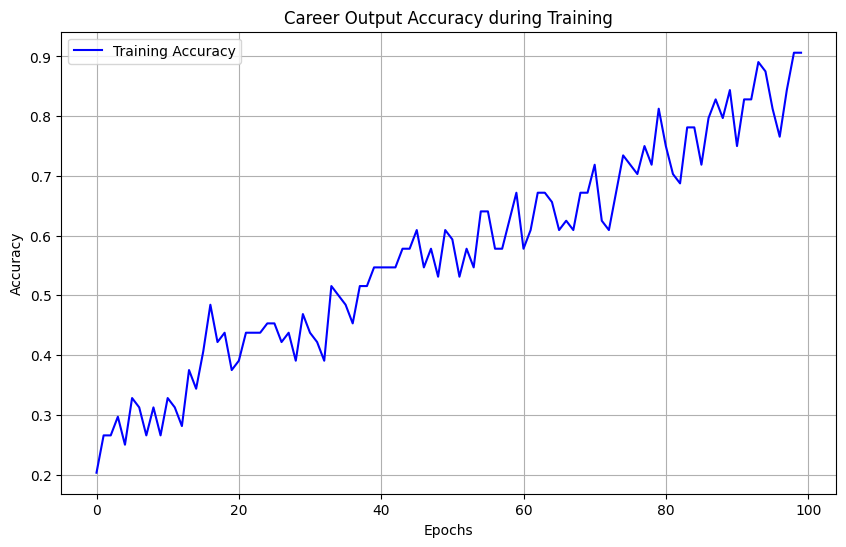

In [ ]:
train_acc = history_career.history['accuracy']

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training Accuracy', color='blue')
plt.title('Career Output Accuracy during Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

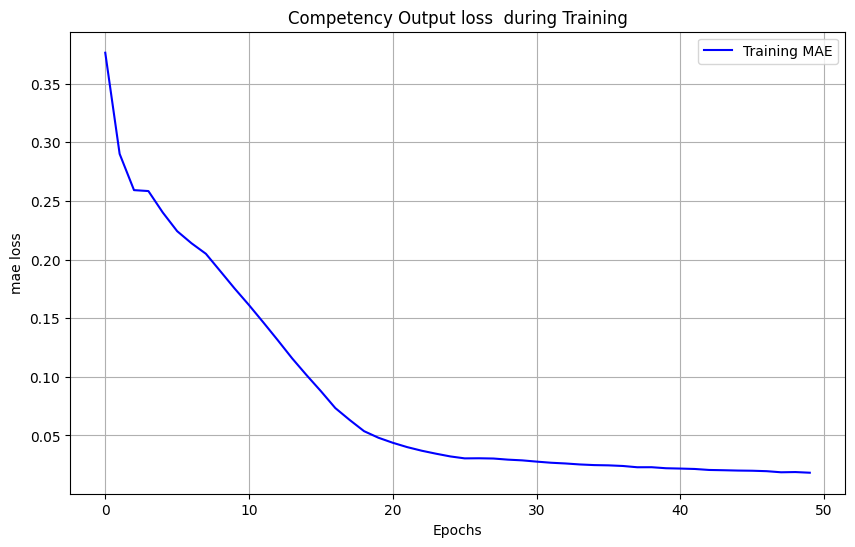

In [ ]:
train_acc = history_competency.history['mae']

# Plot the accuracy
plt.figure(figsize=(10, 6))
plt.plot(train_acc, label='Training MAE', color='blue')
plt.title('Competency Output loss  during Training')
plt.xlabel('Epochs')
plt.ylabel('mae loss')
plt.legend()
plt.grid(True)
plt.show()